# Explore the Paris districts

In this notebook, I introduce a next dataset about Paris: the administrative districts of Paris (compiled from a [**Paris Data open dataset**](https://opendata.paris.fr/explore/dataset/quartier_paris/export/?disjunctive.c_ar)).

The dataset is available as a GeoPackage file, a specialised format to store geospatial vector data, and such a file can be read by GeoPandas using the geopandas.read_file() function.

## Restaurants in Paris 

In [2]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the restaurants csv file
restaurants = pd.read_csv("paris_restaurants.csv")

In [3]:
# Inspect the first rows of restaurants
print(restaurants.head(5))

                                 type              x             y
0                 European restuarant  259641.691646  6.251867e+06
1       Traditional French restaurant  259572.339603  6.252030e+06
2       Traditional French restaurant  259657.276374  6.252143e+06
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4       Traditional French restaurant  259597.943086  6.252230e+06


In [4]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    5735 non-null   object 
 1   x       5735 non-null   float64
 2   y       5735 non-null   float64
dtypes: float64(2), object(1)
memory usage: 134.5+ KB


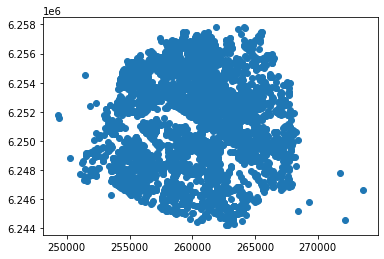

In [11]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o')
plt.show()

## Adding a background map

In [9]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import contextily
import contextily

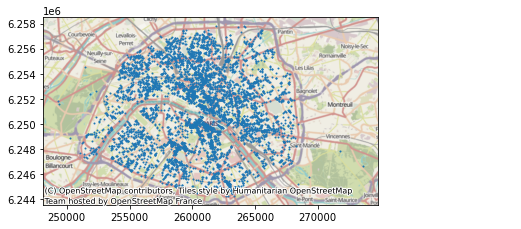

In [12]:
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

## Explore the Paris districts

In [2]:
pip install geopandas

  Attempting uninstall: clickNote: you may need to restart the kernel to use updated packages.

    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [3]:
# Import GeoPandas
import geopandas

In [4]:
# Read the Paris districts dataset
districts = geopandas.read_file('paris_districts_utm.geojson')

In [5]:
# Inspect the first rows
print(districts.head(5))

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


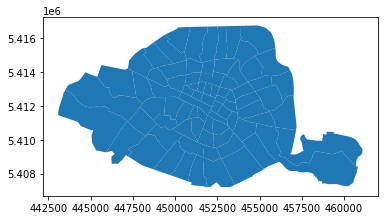

In [8]:
# Make a quick visualization of the districts
districts.plot()
plt.show()

## The Paris restaurants as a GeoDataFrame


In the first coding, I imported the locations of the restaurants in Paris from a csv file. To enable the geospatial functionality of GeoPandas, I want to convert the pandas DataFrame to a GeoDataFrame. 

In [4]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

In [5]:
# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.x, df.y))

In [11]:
# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head(5))

                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


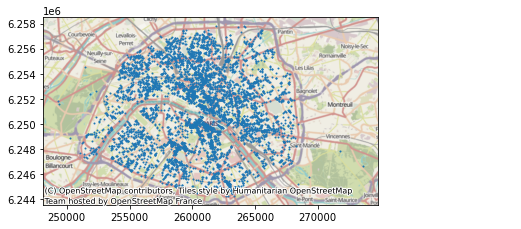

In [12]:
# Make a plot of the restaurants
ax = restaurants.plot(markersize=1)
import contextily
contextily.add_basemap(ax)
plt.show()

## Visualizing the population density

I visualize the spatial variation of the population density within the center of Paris. For this, we will first calculate the population density by dividing the population number with the area, and add it as a new column to the dataframe.

In [13]:
# Inspect the first rows of the districts dataset
print(districts.head(5))

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


In [14]:
# Inspect the area of the districts
print(districts.geometry.area)

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


In [15]:
# Add a population density column
districts['population_density'] =  districts['population']/ districts.geometry.area * 10**6

In [16]:
districts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  80 non-null     int64   
 1   district_name       80 non-null     object  
 2   population          80 non-null     int64   
 3   geometry            80 non-null     geometry
 4   population_density  80 non-null     float64 
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 3.2+ KB


In [17]:
districts.head(5)

,id,district_name,population,geometry,population_density
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",1925.074371
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",21793.281432
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",11679.793285
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",11302.915113
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",7157.691434


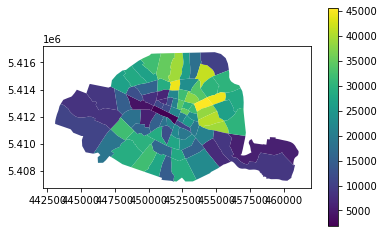

In [18]:
# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

## Using pandas functionality: groupby 

In [19]:
# Load the restaurants data
restaurants = geopandas.read_file("paris_restaurants.csv")

In [6]:
restaurants.head()

,type,x,y,geometry
0,European restuarant,259641.691646,6.251867e+06,POINT (259641.692 6251867.063)
1,Traditional French restaurant,259572.339603,6.252030e+06,POINT (259572.340 6252029.683)
2,Traditional French restaurant,259657.276374,6.252143e+06,POINT (259657.276 6252143.401)
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06,POINT (259684.438 6252203.137)
4,Traditional French restaurant,259597.943086,6.252230e+06,POINT (259597.943 6252230.044)


In [8]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type')

In [9]:
# Print the result
print(type_counts)

## Plotting multiple layers 

Another typical pandas functionality is filtering a dataframe: taking a subset of the rows based on a condition (which generates a boolean mask).
I take the subset of all African restaurants, and then make a multi-layered plot. In such a plot, I combine the visualization of several GeoDataFrames on a single figure.

In [10]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type'] == 'African restaurant']

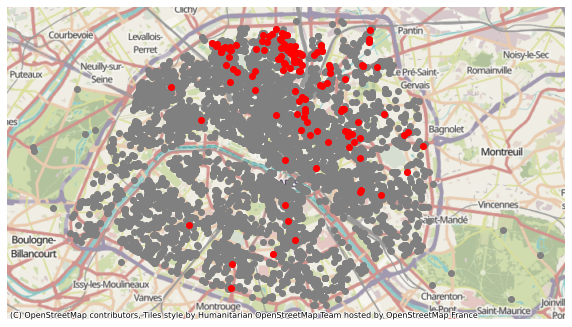

In [14]:
# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='grey')
african_restaurants.plot(ax=ax, color='red')
# Remove the box, ticks and labels
ax.set_axis_off()
contextily.add_basemap(ax)
plt.show()